In [12]:
import pymongo
import jieba


class MongoDB():
    def __init__(self, database_name, host, port, username, password):
        self._database_name = database_name
        self._host = host
        self._port = port
        self._username = username
        self._password = password

    def _connect(self) -> pymongo.mongo_client.database.Database:
        myclient = pymongo.MongoClient(f"mongodb://{self._username}:{self._password}@{self._host}:{self._port}")
        dblist = myclient.list_database_names()
        if self._database_name in dblist:
            print("database exists")
            return myclient[self._database_name]
        else:
            print("database does not exist, creating")
            mydb = myclient[self._database_name]
            return mydb

    def _disconnect(self):
        print("Disconnecting from MongoDB")

    def get_database_connection(self):
        return self._connect()

    def get_collection(self, collection_name):
        if collection_name in self._connect().list_collection_names():
            return self._connect()[collection_name]
        else:
            return None

    def create_collection(self, collection_name) -> pymongo.collection.Collection:
        mycol = self._connect()[collection_name]
        return mycol

    def insert_one(self, collection_name, data):
        self._connect()[collection_name].insert_one(data)

    def delete_one(self, collection_name, query):
        self._connect()[collection_name].delete_one(query)

    def update_one(self, collection_name, query, data):
        self._connect()[collection_name].update_one(query, data)

    def find_one(self, collection_name, query):
        return self._connect()[collection_name].find_one(query)

    def find_many(self, collection_name, query):
        return self._connect()[collection_name].find(query)

    def find_one_and_update(self, collection_name, query, data):
        return self._connect()[collection_name].find_one_and_update(query, data)



In [2]:
mongo_client = MongoDB("graphs", "localhost",27017,"root","root")

database exists


In [22]:
from PIL import Image
from io import BytesIO
def parse_words(str_content: str) -> list[str]:
    """
    :param str_content: 字符输入，建议输入句子级别的字符
    :return: 分词结果
    """
    word_generator = jieba.cut(str_content)
    return [w for w in word_generator]


    

        
        

database exists


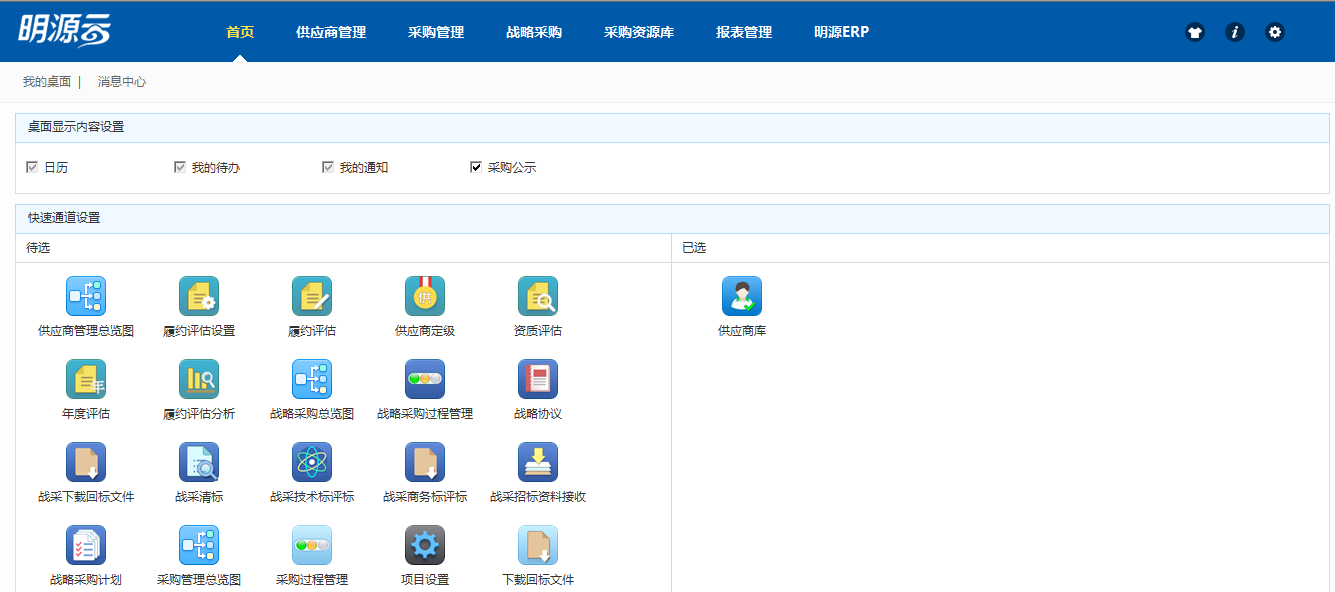

In [29]:
res = mongo_client.find_one("data",{"word":"设置"})
stream = None
if res != None:
    image = res["image"]
    stream = BytesIO(res["image"][0])
Image.open(stream)

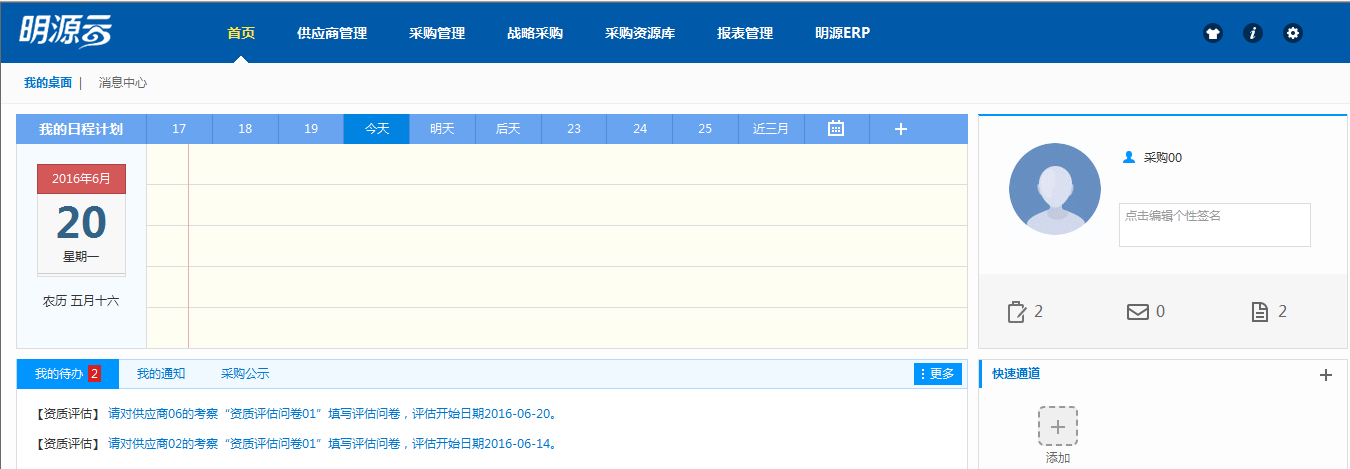

In [11]:
from PIL import Image
from io import BytesIO
stream = None

if res != None:
    image = res["image"]
    stream = BytesIO(res["image"][0])

Image.open(stream)
